# Lab 1

### (a)

In [2]:
def mergeInsertionSort(arr, s):
    comparisons = 0

    #merge sort
    if len(arr)>s: #if array size larger than 100 use merge
        mid = len(arr)//2

        L = arr[:mid]
        R = arr[mid:]

        #Capture and accumulate comparisons from recursive calls
        comparisons += mergeInsertionSort(L, s)
        comparisons += mergeInsertionSort(R, s)

        i=0 #pointer for left
        j=0 #pointer for right
        k=0 #pointer for main arr

        while i<len(L) and j<len(R):

            if L[i] <= R[j]:
                arr[k] = L[i]
                i+=1
            else:
                arr[k] = R[j]
                j+=1
            k+=1
            comparisons += 1

        # Copy remaining elements of L[], if there are any
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        # Copy remaining elements of R[], if there are any
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


    #insertion sort for s<100
    else:
        for i in range(1, len(arr)):
            
            current_value = arr[i]

            #position of last element sorted
            pos = i - 1

            # Move elements of arr[0..i-1], that are
		    # greater than key, to one position ahead
		    # of their current position
            while pos >= 0:
                comparisons += 1
                if arr[pos] > current_value:
                    arr[pos + 1] = arr[pos]
                    pos -= 1
                else:
                    break

            #insert curr val into correct pos
            arr[pos + 1] = current_value

        
    return comparisons
        

# Code to print the list
def printList(arr):
	for i in range(len(arr)):
		print(arr[i], end=" ")
	print()

# Driver Code
# Driver Code
if __name__ == '__main__':
    arr = [12, 11, 13, 5, 6, 7]
    print("Given array is", end="\n")
    printList(arr)

    # 1. Store the returned value in a variable
    total_comparisons = mergeInsertionSort(arr, 3)

    print("Sorted array is: ", end="\n")
    printList(arr)

    # 2. Print the variable
    print(f"\nTotal comparisons made: {total_comparisons}")

    



Given array is
12 11 13 5 6 7 
Sorted array is: 
5 6 7 11 12 13 

Total comparisons made: 7


### (c) i

In [3]:
import random
import pandas as pd

# Parameters
sizes = [1000 * 2**i for i in range(14)]  # Up to ~8 million
S = 50  # Threshold for switching to insertion sort

results = []

for size in sizes:
    newlst = [random.randint(0, 10**7 - 1) for _ in range(size)]
    comp = mergeInsertionSort(arr=newlst, s=S)
    results.append({'Size': size, 'Comparisons': comp})
    print(f"Size: {size}, Comparisons: {comp}")

# Create DataFrame
df = pd.DataFrame(results)

# Show the DataFrame
print(df)

Size: 1000, Comparisons: 13280
Size: 2000, Comparisons: 28919
Size: 4000, Comparisons: 61668
Size: 8000, Comparisons: 130869
Size: 16000, Comparisons: 277520
Size: 32000, Comparisons: 588176
Size: 64000, Comparisons: 1239770
Size: 128000, Comparisons: 2606872
Size: 256000, Comparisons: 5468906
Size: 512000, Comparisons: 11457262
Size: 1024000, Comparisons: 23931216
Size: 2048000, Comparisons: 49912938
Size: 4096000, Comparisons: 103928615
Size: 8192000, Comparisons: 216063030
       Size  Comparisons
0      1000        13280
1      2000        28919
2      4000        61668
3      8000       130869
4     16000       277520
5     32000       588176
6     64000      1239770
7    128000      2606872
8    256000      5468906
9    512000     11457262
10  1024000     23931216
11  2048000     49912938
12  4096000    103928615
13  8192000    216063030


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

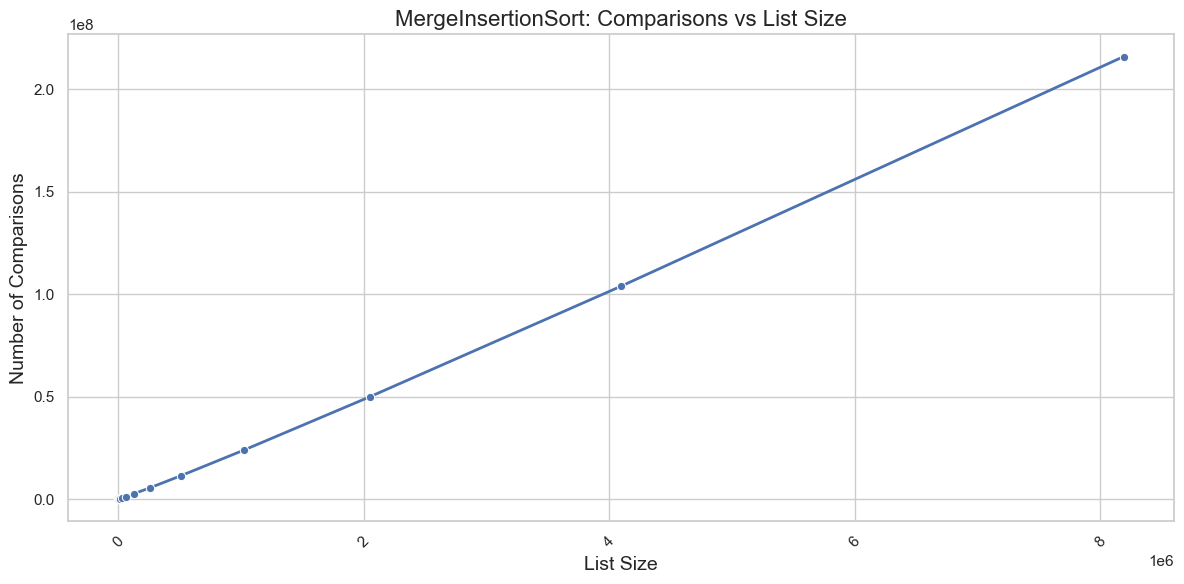

In [ ]:
sns.set_theme(style="whitegrid", context="notebook")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Size', y='Comparisons', marker='o', linewidth=2)

plt.title("MergeInsertionSort: Comparisons vs List Size", fontsize=16)
plt.xlabel("List Size", fontsize=14)
plt.ylabel("Number of Comparisons", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### (c) ii

In [7]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume this is your sorting function:
# from your_sorting_module import mergeInsertionSort

# Test parameters
sizes = [1000 * 2**i for i in range(10)]  # Up to ~512,000 (adjust as needed)
S_values = [10, 20, 50, 100, 200]         # Varying insertion sort thresholds

results = []

# Main benchmarking loop
for S in S_values:
    for size in sizes:
        newlst = [random.randint(0, 10**7 - 1) for _ in range(size)]
        comp = mergeInsertionSort(arr=newlst.copy(), s=S)
        results.append({
            'Size': size,
            'Comparisons': comp,
            'S': S
        })
        print(f"S: {S}, Size: {size}, Comparisons: {comp}")

# Create DataFrame
df = pd.DataFrame(results)

# Show the first few rows
print(df.head())


S: 10, Size: 1000, Comparisons: 9077
S: 10, Size: 2000, Comparisons: 20260
S: 10, Size: 4000, Comparisons: 44437
S: 10, Size: 8000, Comparisons: 96879
S: 10, Size: 16000, Comparisons: 209500
S: 10, Size: 32000, Comparisons: 452255
S: 10, Size: 64000, Comparisons: 967922
S: 10, Size: 128000, Comparisons: 2064259
S: 10, Size: 256000, Comparisons: 4383742
S: 10, Size: 512000, Comparisons: 9281243
S: 20, Size: 1000, Comparisons: 10289
S: 20, Size: 2000, Comparisons: 22619
S: 20, Size: 4000, Comparisons: 49646
S: 20, Size: 8000, Comparisons: 106692
S: 20, Size: 16000, Comparisons: 228764
S: 20, Size: 32000, Comparisons: 490064
S: 20, Size: 64000, Comparisons: 1045680
S: 20, Size: 128000, Comparisons: 2217868
S: 20, Size: 256000, Comparisons: 4688890
S: 20, Size: 512000, Comparisons: 9890490
S: 50, Size: 1000, Comparisons: 13366
S: 50, Size: 2000, Comparisons: 28745
S: 50, Size: 4000, Comparisons: 61781
S: 50, Size: 8000, Comparisons: 130302
S: 50, Size: 16000, Comparisons: 277285
S: 50, Siz

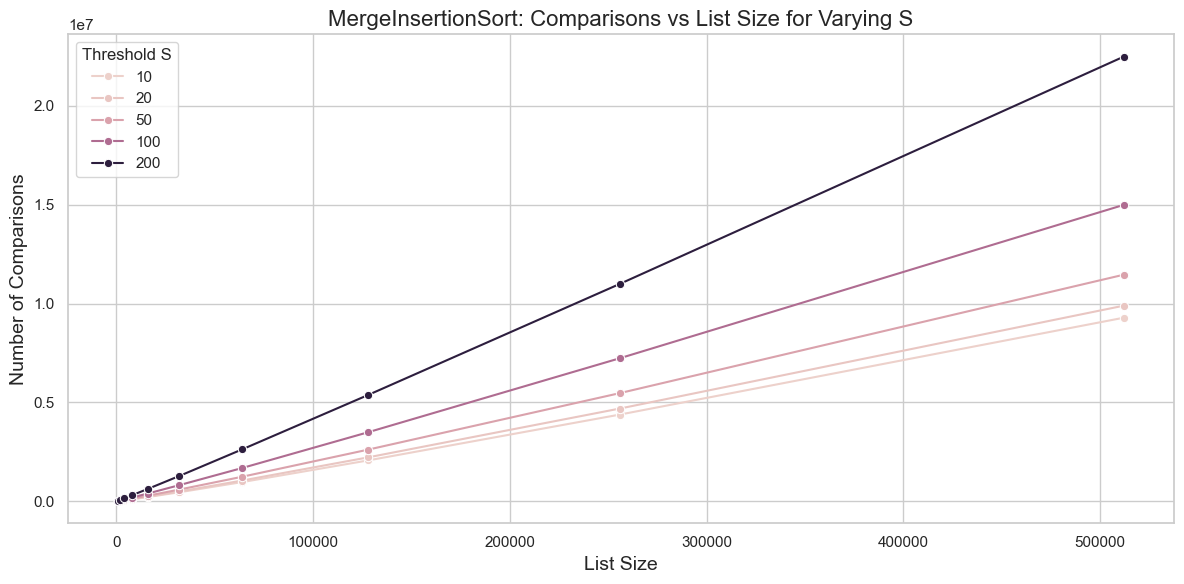

In [8]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(12, 6))

# Multiple lines: one per value of S
sns.lineplot(data=df, x='Size', y='Comparisons', hue='S', marker='o')

plt.title("MergeInsertionSort: Comparisons vs List Size for Varying S", fontsize=16)
plt.xlabel("List Size", fontsize=14)
plt.ylabel("Number of Comparisons", fontsize=14)
plt.legend(title="Threshold S")
plt.tight_layout()
plt.show()
